In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Load MNIST
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.astype(np.float32) / 255.0
y = mnist.target.astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Convert to NumPy arrays (in case they are DataFrames)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

print("Training samples:", X_train.shape, "Test samples:", X_test.shape)


Training samples: (56000, 784) Test samples: (14000, 784)


In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)


In [ ]:
input_size = 784
hidden_size = 32
lr = 0.01

# Initialize weights and biases
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, input_size) * 0.01
b2 = np.zeros((1, input_size))


In [ ]:
def forward(X):
    global z1, a1, z2, a2
    z1 = X @ W1 + b1
    a1 = sigmoid(z1)  # Latent representation
    z2 = a1 @ W2 + b2
    a2 = sigmoid(z2)  # Reconstructed output
    return a2


In [ ]:
def mse_loss(y_pred, y_true):
    return np.mean((y_pred - y_true) ** 2)


In [ ]:
def backward(X, y_true, y_pred):
    global W1, b1, W2, b2
    m = X.shape[0]

    dz2 = (y_pred - y_true) * sigmoid_derivative(z2)
    dW2 = a1.T @ dz2 / m
    db2 = np.sum(dz2, axis=0, keepdims=True) / m

    dz1 = dz2 @ W2.T * sigmoid_derivative(z1)
    dW1 = X.T @ dz1 / m
    db1 = np.sum(dz1, axis=0, keepdims=True) / m

    # Update weights
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2


In [ ]:
epochs = 50
loss_history = []

for i in range(epochs):
    y_pred = forward(X_train)
    loss = mse_loss(y_pred, X_train)
    loss_history.append(loss)
    backward(X_train, X_train, y_pred)

    if (i+1) % 10 == 0:
        print(f"Epoch {i+1}/{epochs}, Loss: {loss:.6f}")


Epoch 10/50, Loss: 0.214316
Epoch 20/50, Loss: 0.190615
Epoch 30/50, Loss: 0.162757
Epoch 40/50, Loss: 0.138642
Epoch 50/50, Loss: 0.121226


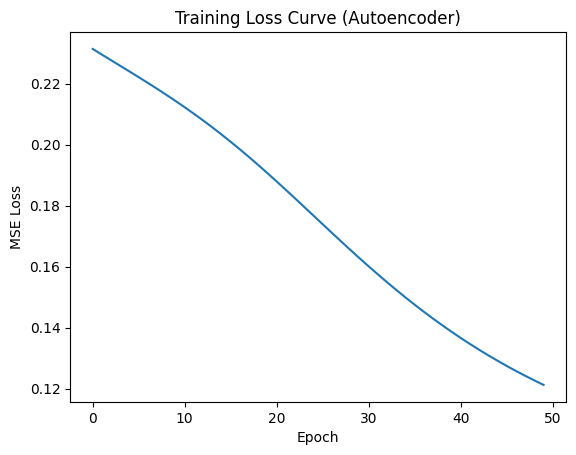

In [ ]:
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss Curve (Autoencoder)")
plt.show()


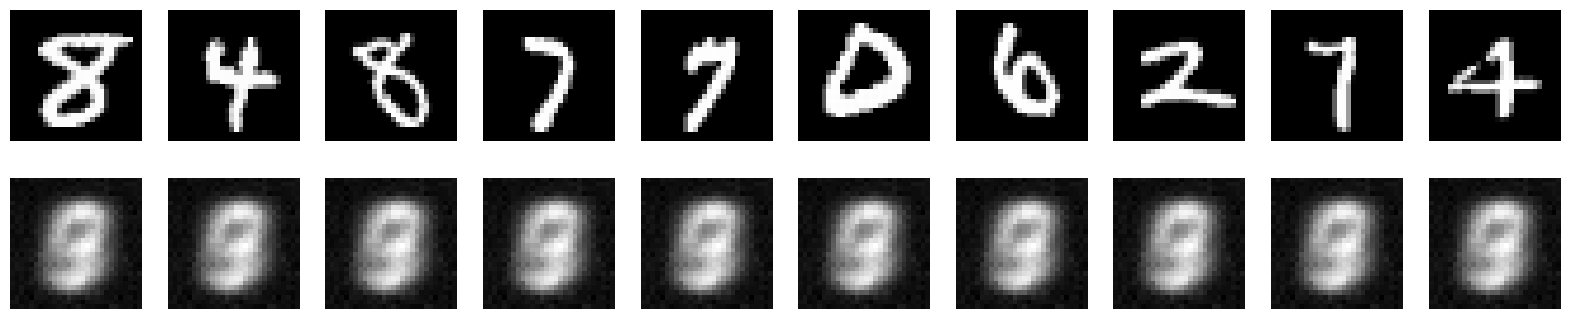

In [ ]:
n = 10
samples = X_test[:n]
reconstructed = forward(samples)

plt.figure(figsize=(20,4))
for i in range(n):
    # Original
    plt.subplot(2, n, i+1)
    plt.imshow(samples[i].reshape(28,28), cmap='gray')
    plt.axis('off')

    # Reconstructed
    plt.subplot(2, n, i+1+n)
    plt.imshow(reconstructed[i].reshape(28,28), cmap='gray')
    plt.axis('off')
plt.show()


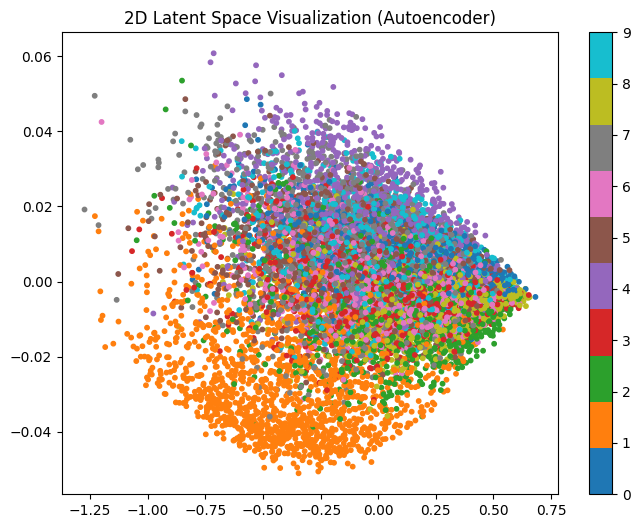

In [ ]:
# Encode all test images
_ = forward(X_test)
latent_vectors = a1  # 32-dim latent space

# Reduce to 2D using PCA for visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
latent_2d = pca.fit_transform(latent_vectors)

plt.figure(figsize=(8,6))
plt.scatter(latent_2d[:,0], latent_2d[:,1], c=y_test, cmap='tab10', s=10)
plt.colorbar()
plt.title("2D Latent Space Visualization (Autoencoder)")
plt.show()
